# Orthogonal Matrices

Let $\mathbf{A} : \mathbb{R}^n \to \mathbb{R}^n$ be an orthogonal linear
operator, i.e., its columns are orthonormal vectors. In this case, there
exists $\mathbf{A}^{-1} = \mathbf{A}^\top$, i.e.,
$\mathbf{A}^\top \mathbf{A} = \mathbf{I}$. Existence of the inverse
implies that the dimension of the null space is equal to zero, therefore
the only vector $\mathbf{v}$ that satisfies $\mathbf{A}\mathbf{v} = 0$
is $\mathbf{v} = 0$. Consequently $\lambda = 0$ cannot be an eigenvalue
of $\mathbf{A}$, for that would require $\mathbf{A}\mathbf{v} = 0$ for
some $\mathbf{v} \ne 0$. We shall show that, in fact, orthogonal
matrices have all eigenvalues with magnitude equal to one. *19. Tétel*

> *The eigenvalues of an orthogonal linear operator have magnitude equal
> to one.*

Let us assume that $\lambda$ is an eigenvalue of
$\mathbf{A}$, an orthogonal operator in $\mathbb{R}$, associated with
the eigenvector $\mathbf{v}$. Let us also assume that
$\|\mathbf{v}\| = 1$ without loss of generality. Therefore
$\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ and also
$\mathbf{v}^H \mathbf{A}\mathbf{v} = \lambda \mathbf{v}^H \mathbf{v} = \lambda$,
where $(\cdot)^*$ denotes the complex conjugate, and $(\cdot)^H$ the
Hermitian, i.e., the complex conjugate of the transpose. As the
Hermitian of a scalar is its complex conjugate, we have
$(\mathbf{v}^H \mathbf{A} \mathbf{v})^H = \mathbf{v}^H \mathbf{A}^\top \mathbf{v} = \bar{\lambda}$.
But as $\mathbf{A}$ is orthogonal,
$\mathbf{A}^\top \mathbf{A} = \mathbf{v} = \lambda \mathbf{A}^\top \mathbf{v}$
and $\mathbf{v}^H \mathbf{v} = 1 = \lambda \bar{\lambda} = |\lambda|^2$.

The eigenvalues of orthogonal symmetric matrices are either $1$, or
$-1$.

### Applications
#### 2D and 3D rotation using orthogonal matrices

Orthognal Matrices are also isometric transformations, it means that when we apply a vector to it, the result will have the same orginal module and, 
if we're considering more than one vector, the angle between them will also be preserved. This property will allow us to use isometric matrices to
various aplications, such as 2D and 3D rotation of objects, once they won't be distorted by the transformation.

First, lets see how it works for 2D objects. In the example bellow, using matrices, you'll be able to define a polygon in the XY plan and create a orthogonal rotation matrix based on an inputed angle (in degrees). Once it's done, just click the "ROTATE" button  and analyse the rotation.

In [6]:
%pip install -q ipywidgets==8.0.7 

In [29]:
%pip install matplotlib ipywidgets scipy scikit-image

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets
from IPython.display import display, clear_output

In [20]:
def get_object(obj_type):
    if obj_type == 'square':
        return np.array([[1, 1], [-1, 1], [-1, -1], [1, -1], [1, 1]])
    elif obj_type == 'triangle':
        return np.array([[1, 1], [0, 1], [-1, -1], [1, 1]])
    elif obj_type == 'pentagon':
        return np.array([[-0.5, -1], [0.5, -1], [1, 0], [0, 1], [-1, 0], [-0.5, -1]])
    else:
        return np.array([[0, -1], [1, -0.5], [1, 0.5], [0, 1], [-1, 0.5], [-1, -0.5], [0, -1]])

def rotate(obj, angle_degrees):
    angle_rad = np.deg2rad(angle_degrees)
    rot_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                           [np.sin(angle_rad),  np.cos(angle_rad)]])
    return obj @ rot_matrix.T

def interactive_rotation(obj_type, angle_degrees):
    obj = get_object(obj_type)
    rotated = rotate(obj, angle_degrees)
    
    clear_output(wait=True)
    plt.figure(figsize=(6, 6))
    plt.plot(obj[:, 0], obj[:, 1], 'b-', label='Original')
    plt.plot(rotated[:, 0], rotated[:, 1], 'r--', label=f'Rotated ({angle_degrees}°)')
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.legend()
    plt.title("Rotation of an object with orthogonal matrices")
    plt.show()

object_selector = widgets.RadioButtons(
    options=['triangle', 'square', 'pentagon', 'hexagon'],
    value='square', 
    description='Object:',
)

angle_selector = widgets.IntSlider(
    value=45,
    min=0,
    max=360,
    step=15,
    description='Rotation Angle:',
    continuous_update=True
)

ui = widgets.VBox([object_selector, angle_selector])
out = widgets.interactive_output(interactive_rotation, {
    'obj_type': object_selector,
    'angle_degrees': angle_selector
})

display(ui, out)

Output()

Let's do it again, but now for a cube in a 3D space. This try to create diferent polyhedrons (such as pyramids and hexahedrons) by modifing the "points" array directly in the code.

In [28]:
def get_cube():
    points = np.array([[x, y, z] for x in [-1, 1] for y in [-1, 1]for z in [-1, 1]])
    return points

#getting faces of the cube
def get_faces(points):
    return [[points[j] for j in [0, 1, 3, 2]],
            [points[j] for j in [4, 5, 7, 6]],
            [points[j] for j in [0, 1, 5, 4]],
            [points[j] for j in [2, 3, 7, 6]],
            [points[j] for j in [1, 3, 7, 5]],
            [points[j] for j in [0, 2, 6, 4]]]

def rotation_matrix(axis, angle_degrees):
    angle = np.deg2rad(angle_degrees)
    if axis == 'x':
        return np.array([[1, 0, 0], [0, np.cos(angle), -np.sin(angle)], [0, np.sin(angle),  np.cos(angle)]])
    elif axis == 'y':
        return np.array([[ np.cos(angle), 0, np.sin(angle)], [0, 1, 0], [-np.sin(angle), 0, np.cos(angle)]])
    elif axis == 'z':
        return np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle),  np.cos(angle), 0], [0, 0, 1]])


# Função principal interativa
def interactive_cube(axis, angle):
    cube = get_cube()
    rot = rotation_matrix(axis, angle)
    rotated = cube @ rot.T
    faces = get_faces(rotated)
    clear_output(wait=True)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', edgecolors='black', linewidths=1, alpha=0.8))
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_box_aspect([1,1,1])
    ax.set_title(f"Rotated Cube around '{axis}' axis ({angle}°)")
    plt.show()

axis_selector = widgets.RadioButtons(options=['x', 'y', 'z'], value='x',description='Axis:')
angle_slider = widgets.IntSlider(value=0, min=0, max=360, step=15, description='Angle:', continuous_update=True)
ui = widgets.VBox([axis_selector, angle_slider])
out = widgets.interactive_output(interactive_cube, {'axis': axis_selector,'angle': angle_slider})

display(ui, out)

Output()

#### Discrete Cosine Transform (DCT)
The discrete cosine transform (DCT) represents an image as a sum of sinusoids of varying magnitudes and frequencies. The DCT2D function computes the two-dimensional discrete cosine transform (DCT) of an image. The DCT has the property that, for a typical image, most of the visually significant information about the image is concentrated in Low-frequencies (smooth regions), while High-frequency details (sharp edges, noise) can often be discarded without a noticeable effect. For this reason, the DCT is often used in image compression applications. For example, the DCT is at the heart of the international standard lossy image compression algorithm known as JPEG.

Imagine a row of pixel values:  
[100, 105, 110, 115, 120] → smooth change (low frequency).

[100, 150, 100, 150, 100] → rapid change (high frequency).

The DCT can express this sequence as a combination of cosine functions.  
For one dimension (1D), For a sequence of N values x[k], the DCT is:

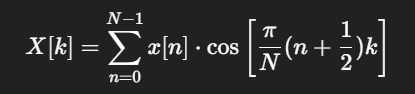  

**Notice:** For images, we use the 2D DCT — apply it to rows and then to columns.  

The values **X[k]** are the **DCT coefficients**, which indicate how much of each frequency is present in the original signal or image.  
You can imagine this transformation like this:  
> **Original 8x8 image block**  
↓  
**Apply DCT**  
↓  
**8x8 matrix of coefficients (frequency information)**
> 

**[0,0] coefficient:** represents the average intensity (DC component).  
**Other coefficients:** represent higher frequency patterns — edges, textures, etc  

The coefficients that represents the higher frequency patterns can be removed gradually, so the image gets compressed (loses quality). You can see it in the example bellow, where you can select the percentage of remaining coeffiecients. Notice that the more you decrease this level, the less image details can be distinguished.


In [32]:
from skimage import data, color
from scipy.fftpack import dct, idct

In [37]:
img = color.rgb2gray(data.astronaut())  
img = img[:256, :256] #cropping image to see the changes better

# DCT 2D
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# IDCT 2D
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

# Compression
def compress_image(keep_ratio):
    dct_coeffs = dct2(img)
    threshold = np.percentile(np.abs(dct_coeffs), 100 - keep_ratio)
    dct_low = dct_coeffs * (np.abs(dct_coeffs) >= threshold)
    img_reconstructed = idct2(dct_low)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Imagem Original")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.title(f"Reconstruída ({keep_ratio:.0f}% coef.)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

compress_slider = widgets.IntSlider(value=100, min=1, max=100, step=1,description='Remaining (%)',continuous_update=True)

widgets.interact(compress_image, keep_ratio=compress_slider)


interactive(children=(IntSlider(value=100, description='Remaining (%)', min=1), Output()), _dom_classes=('widg…

<function __main__.compress_image(keep_ratio)>

<br>
<p style="text-align:left;">
    <a href="5.3 - NUMBER OF EIGENVALUES AND EIGENVECTORS.ipynb">⬅️PREVIOUS</a>
    <span style="float:right;">
        <a href="5.6 - GENERALIZED EIGENVECTORS.ipynb" >NEXT➡️</a>
    </span>
</p>